# Dropout



- 드롭아웃이란 확률적으로 랜덤하게 몇 가지의 뉴런만 선택하여 정보를 전달하는 과정
- 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌, 확률적으로 버리면서 전달하는 기법
- 드롭아웃은 오버피팅을 막는 regularization layer 중 하나
- 확률을 너무 높이면 (비활성화된 뉴런의 비중을 높이면) 모델 안에서 값들이 제대로 전달되지 않으므로 학습이 잘 되지 않고, 확률을 너무 낮추는 경우에는 fully connected layer와 같이 동작합
- fully connected layer에서 오버피팅이 생기는 경우에 주로 dropout layer를 추가

- **논문 링크 : [논문 주소](https://jmlr.org/papers/v15/srivastava14a.html)**
- **[Keras Dropout](https://keras.io/api/layers/regularization_layers/dropout/)**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist

In [2]:
tf.config.set_visible_devices([], 'GPU')

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

dropout의 확률을 0.9로 주었을 때의 결과를 살펴보도록 하겠습니다.

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 5:43 - loss: 3.7797 - accuracy: 0.1250

2023-05-12 06:17:58.306132: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 643us/step - loss: 1.3806 - accuracy: 0.4596
Epoch 2/5
1875/1875 [==============================] - 1s 660us/step - loss: 1.1640 - accuracy: 0.5292
Epoch 3/5
1875/1875 [==============================] - 1s 632us/step - loss: 1.1103 - accuracy: 0.5514
Epoch 4/5
1875/1875 [==============================] - 1s 633us/step - loss: 1.0942 - accuracy: 0.5552
Epoch 5/5
1875/1875 [==============================] - 1s 637us/step - loss: 1.0712 - accuracy: 0.5656


dropout이 없을 때 실습을 해보면, 5 epoch 정도만 돌려도 충분히 높은 정확도를 볼 수 있습니다.

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.4997 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.3732 - accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.3343 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 1s 625us/step - loss: 0.3100 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 1s 612us/step - loss: 0.2931 - accuracy: 0.8910


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있는데요.   
일부러 중간에 dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다.  
다음은 overfitting이 나는 환경에서 dropout의 중요성을 알아보도록 하겠습니다.

## 실습 (overfitting)

overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다.  
우리는 위의 데이터를 이제 train:valid=99:1의 비율로 나눈 뒤에 loss function의 값을 그려보고,   
overfitting이 생기는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로  
train set을 99%로 늘리고 validation set을 줄였습니다.



In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 0s 3ms/step - loss: 2.0601 - accuracy: 0.5640 - val_loss: 1.6616 - val_accuracy: 0.6283
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 1.4183 - accuracy: 0.6253 - val_loss: 1.1898 - val_accuracy: 0.6750
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.6838 - val_loss: 0.9666 - val_accuracy: 0.7133
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.9051 - accuracy: 0.7170 - val_loss: 0.8278 - val_accuracy: 0.7450
Epoch 5/200
117/117 [==============================] - 0s 2ms/step - loss: 0.7965 - accuracy: 0.7343 - val_loss: 0.7457 - val_accuracy: 0.7650
Epoch 6/200
117/117 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.7469 - val_loss: 0.6932 - val_accuracy: 0.7667
Epoch 7/200
117/117 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.7577 - val_loss: 0.6575 - val_accuracy: 0.7800

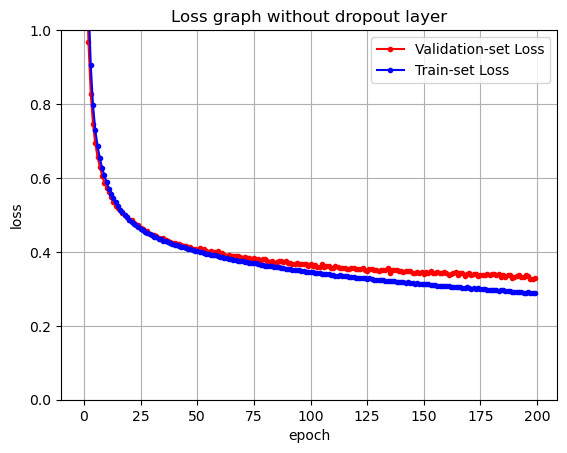

In [7]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

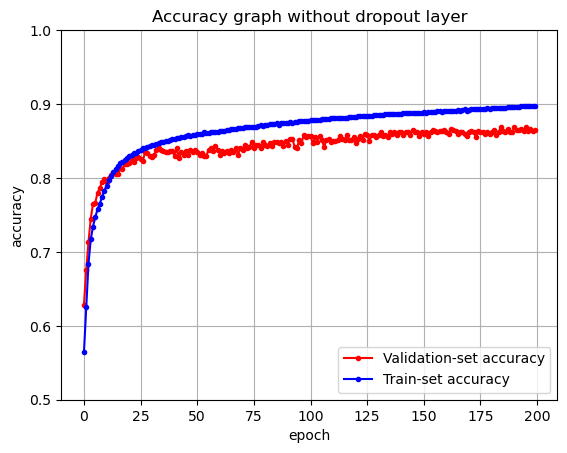

In [8]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


dropout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다.  
그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.


이렇게 오버피팅을 만든 환경에서 dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

### Dropout Layer 를 추가한 경우 

In [10]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 0s 3ms/step - loss: 2.1367 - accuracy: 0.3174 - val_loss: 1.8320 - val_accuracy: 0.5500
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.6927 - accuracy: 0.4044 - val_loss: 1.4211 - val_accuracy: 0.5667
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4560 - accuracy: 0.4636 - val_loss: 1.2271 - val_accuracy: 0.6167
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 1.3242 - accuracy: 0.5061 - val_loss: 1.1097 - val_accuracy: 0.6283
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 1.2349 - accuracy: 0.5416 - val_loss: 1.0273 - val_accuracy: 0.6950
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1750 - accuracy: 0.5630 - val_loss: 0.9621 - val_accuracy: 0.7217
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1207 - accuracy: 0.5872 - val_loss: 0.9114 - val_accuracy: 0.7383

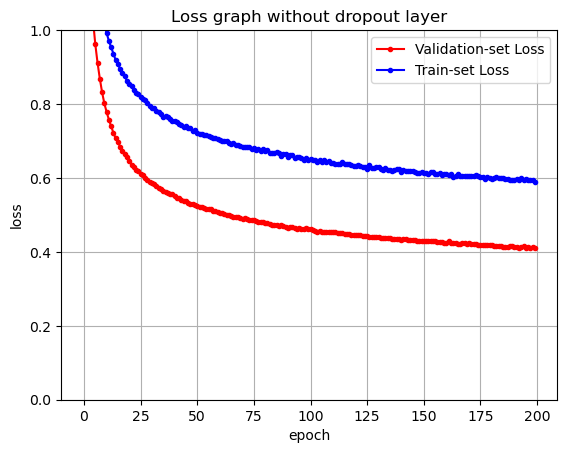

In [11]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

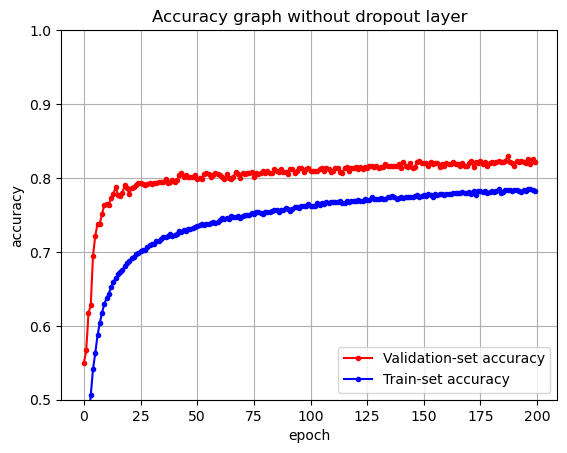

In [12]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
